# Importing Libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importing the Dataset

In [47]:
#train=pd.read_csv('datacollection1-IDLE.csv')
#train=pd.read_csv('datacollection2-NORMAL.csv')
train=pd.read_csv('ubunutu-datacollection3-heavy.csv')

In [48]:
train.head()

,AttackFlag,CPUPercent,AvailableMemory,ActiveMemory,CPUTime-User,CPUTime-System,CPUTime-Idle
0,0,100.0,256380928,2691969024,27475.14,65366.82,168558.44
1,0,99.0,257568768,2691903488,27476.00,65367.94,168558.46
2,0,92.0,263344128,2685566976,27476.72,65369.04,168558.62
3,0,91.8,251150336,2699014144,27477.46,65370.08,168558.77
4,0,91.7,248840192,2701545472,27478.18,65371.12,168558.93


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AttackFlag       3601 non-null   int64  
 1   CPUPercent       3601 non-null   float64
 2   AvailableMemory  3601 non-null   int64  
 3   ActiveMemory     3601 non-null   int64  
 4   CPUTime-User     3601 non-null   float64
 5   CPUTime-System   3601 non-null   float64
 6   CPUTime-Idle     3601 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 197.1 KB


In [50]:
train.isnull()

,AttackFlag,CPUPercent,AvailableMemory,ActiveMemory,CPUTime-User,CPUTime-System,CPUTime-Idle
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3596,False,False,False,False,False,False,False
3597,False,False,False,False,False,False,False
3598,False,False,False,False,False,False,False
3599,False,False,False,False,False,False,False


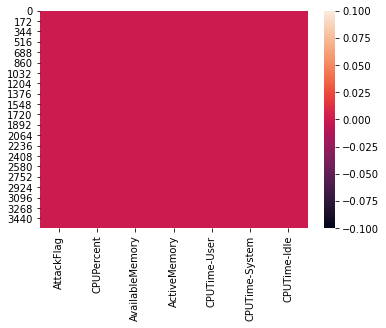

In [51]:
sns.heatmap(train.isnull())

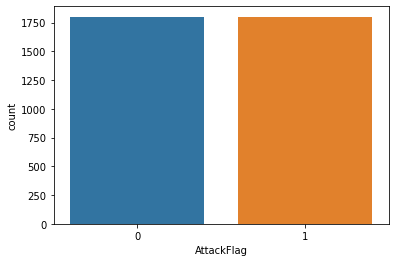

In [52]:
sns.countplot(x='AttackFlag',data=train)

# Test train split

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('AttackFlag',axis=1), train['AttackFlag'], test_size=0.30, random_state=101)

# Training and Predictions

## Create an instance of Random Forest Classifier

In [54]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)

In [55]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

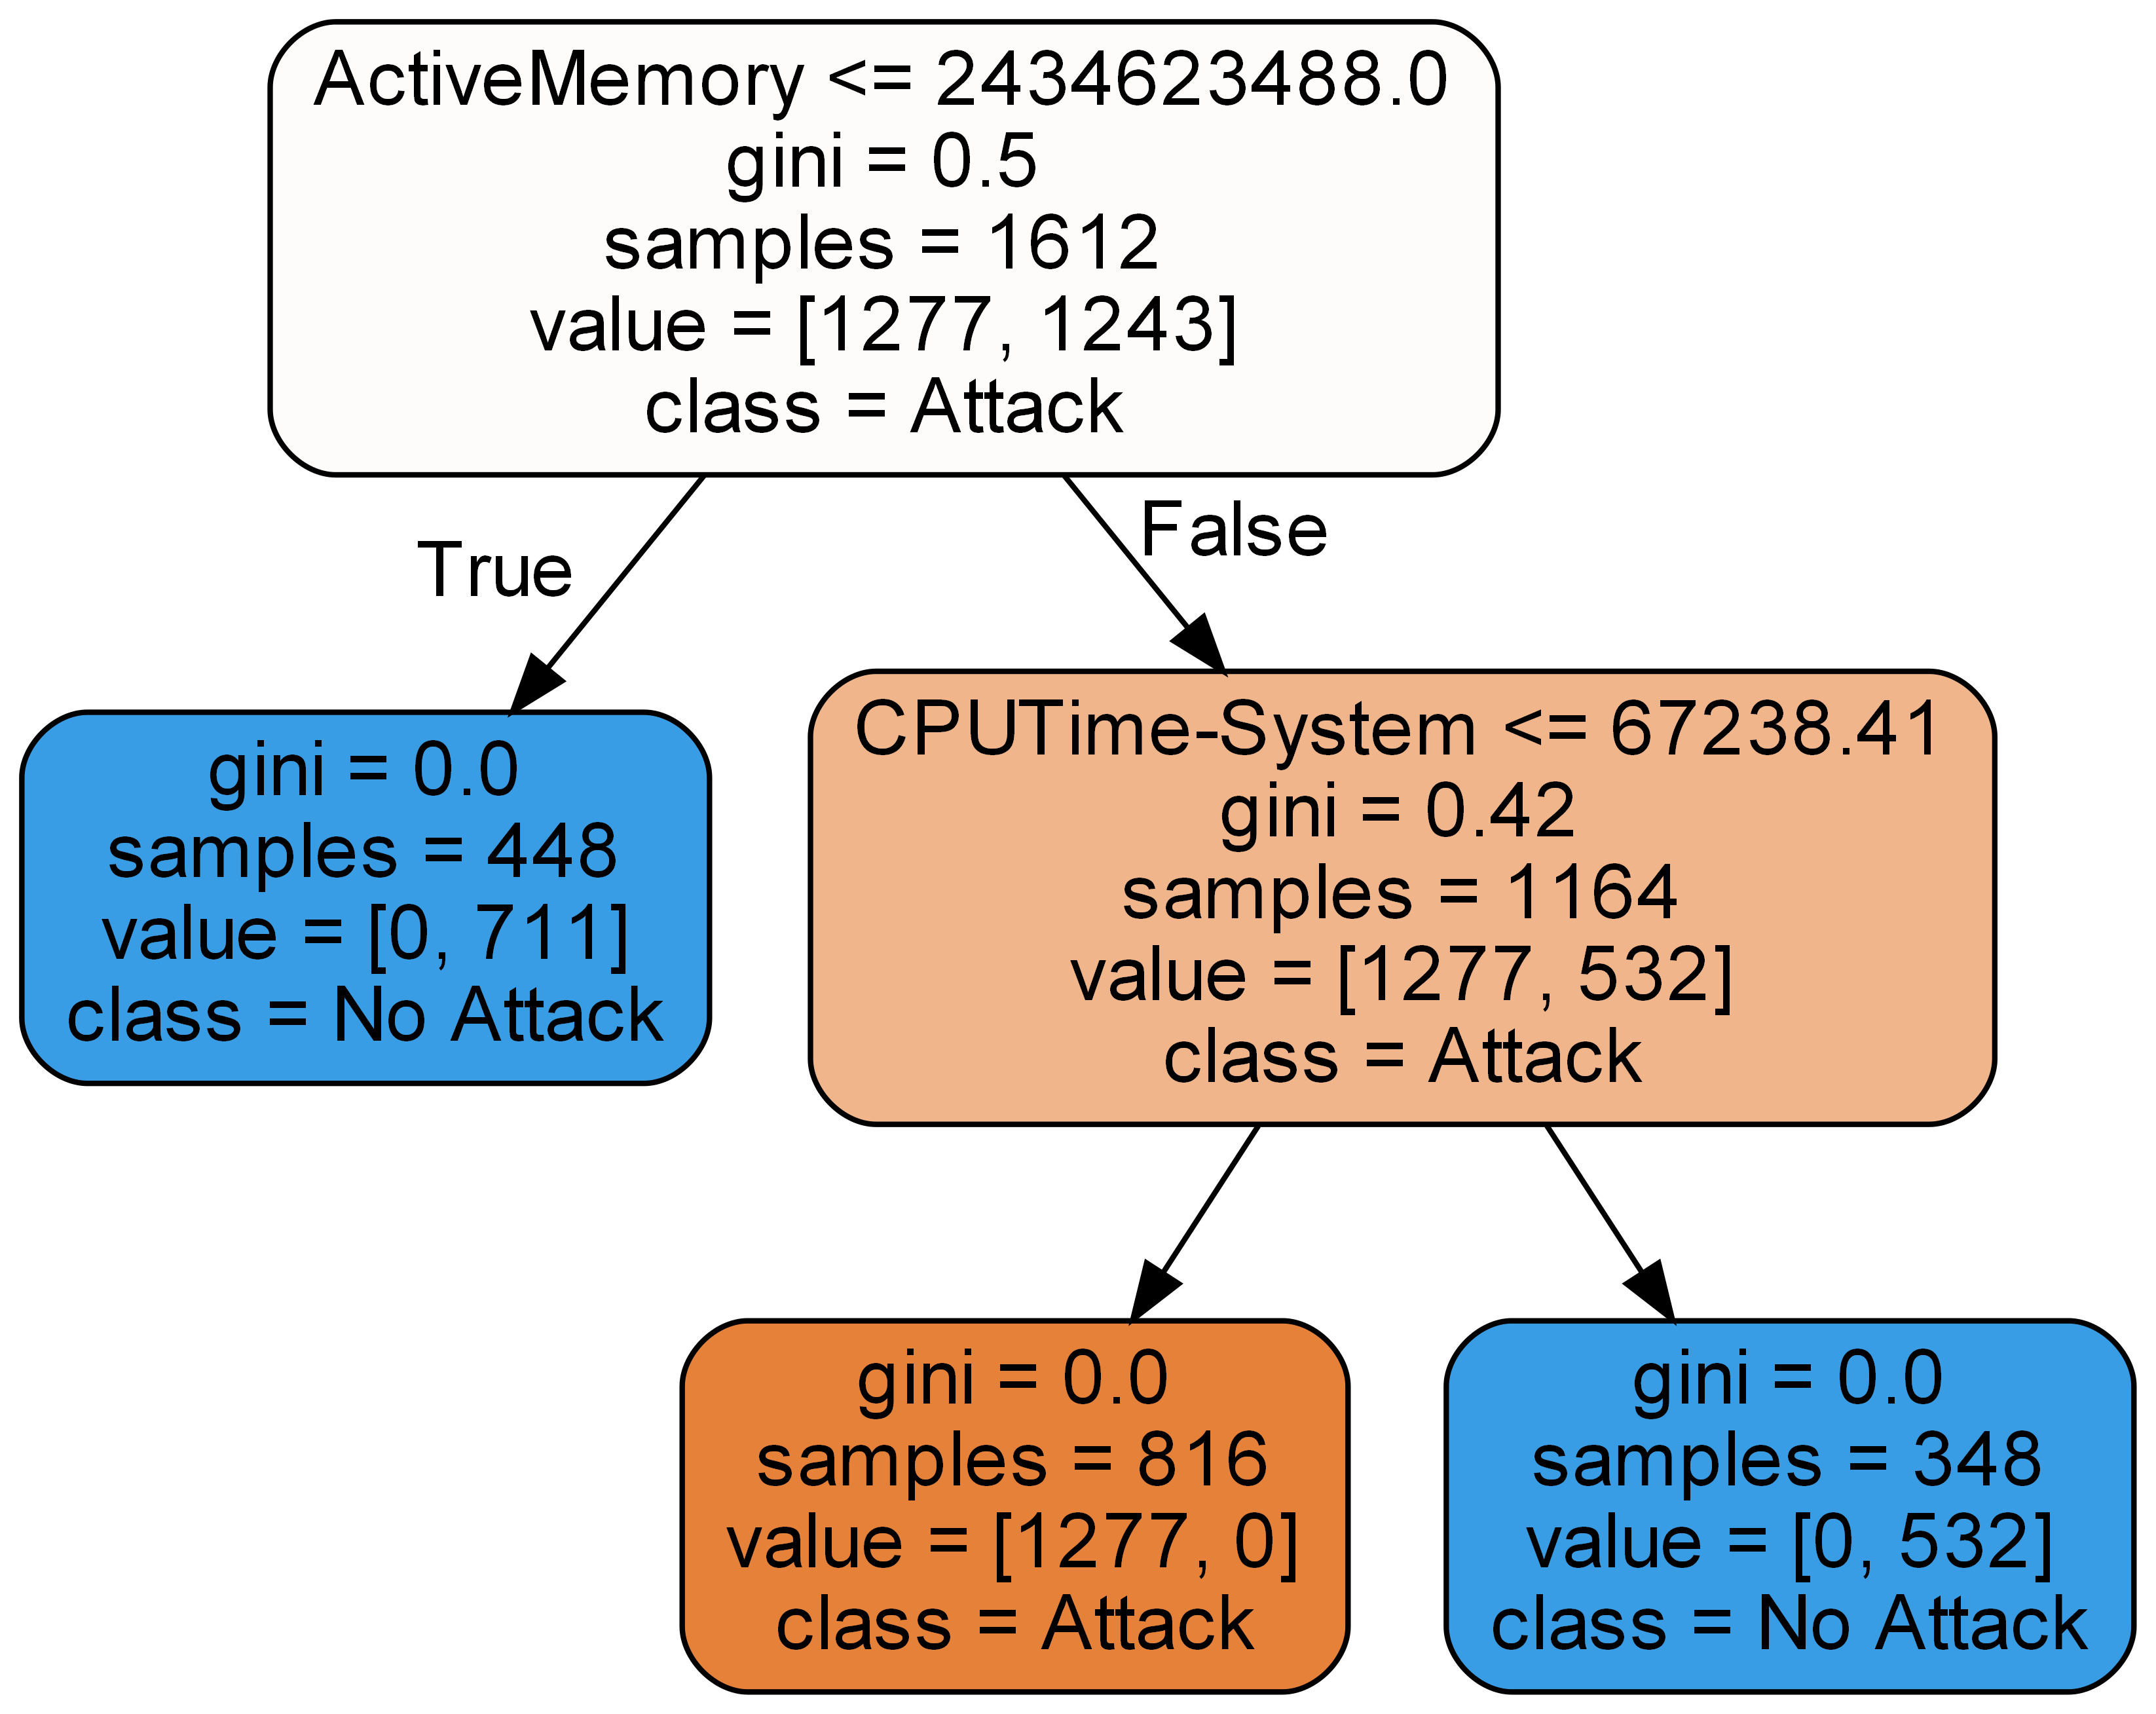

In [56]:
# Extract single tree
estimator = forest.estimators_[3]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = train.drop('AttackFlag',axis=1).columns,
                class_names = ['Attack', 'No Attack'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [57]:
y_pred = forest.predict(X_test)

In [58]:
y_pred_prob = forest.predict_proba(X_test)

In [59]:
print(np.round(y_pred_prob, 4))

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


# Evaluate the Algorithm

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

[[551   0]
 [  0 530]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       1.00      1.00      1.00       530

    accuracy                           1.00      1081
   macro avg       1.00      1.00      1.00      1081
weighted avg       1.00      1.00      1.00      1081

Accuracy: 1.000


# Decision Regions

ValueError: Filler values must be provided when X has more than 2 training features.

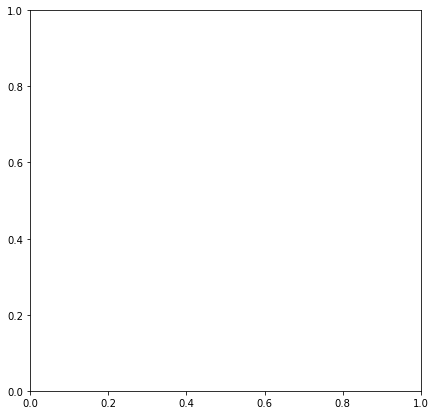

In [61]:
from mlxtend.plotting import plot_decision_regions
 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
 
#
# plot_decision_regions function takes "forest" as classifier
#
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_combined, y_combined, clf=forest)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Feature Importance

In [ ]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.7f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()